In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [3]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [4]:
data_fake['target'] = 'Fake'
data_true['target'] = 'True'

In [5]:
data_fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [6]:
data_true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [7]:
data = pd.concat([data_fake,data_true],axis=0,ignore_index=True)
data

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",True
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",True
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",True
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",True


In [8]:
# count the number of fake and True news. 
data['target'].value_counts()

Fake    23481
True    21417
Name: target, dtype: int64

C:\Users\FRED OJOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

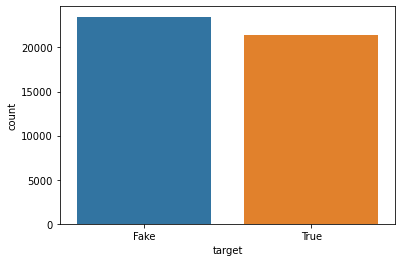

In [9]:
sns.countplot(data['target'])

In [11]:
## DATA PROCESSING
"""checking whether any missing or empty text row is not present in dataset"""
data['text'].isna().sum()

0

In [13]:
#Remove links
"""check whether text column is full link and remove it"""
def remove_link_from(text):
    txt = ''
    text = text.split(' ')
    for tx in text:
        if ('http' in text) or (".com" in text) or ('https' in text) or ('.in' in text) or ('bit.ly' in text) or ('tiny' in text):
            continue
        else:
            txt = txt+tx
    return txt

In [14]:
"""appply it to text column"""
data['text'] = data['text'].apply(remove_link_from)

In [15]:
import re
# remove digit
def remove_digit(data):
    regen_data = re.sub('[^a-zA-Z]',' ',data)
    return regen_data.lower()

In [16]:
data['text'] = data['text'].apply(remove_digit)

In [18]:
#Remove Puntuations
"""now remove the punctuation marks"""
import string
pnc = string.punctuation
pnc+= '\n \n\n \t \t\t \r \b'

In [19]:
def remove_punctuation(txt):
    txt = txt.split()
    txt = [word.lower() for word in txt if word not in pnc]
    return ' '.join(txt)

data['text'] = data['text'].apply(remove_punctuation)
        

In [20]:
"""check number of text with empty entry"""
data[data['text'] == ' ']

,title,text,subject,date,target


In [21]:
"""split independent and dependent data"""
X = data['text']
y = data['target']

In [22]:
"""perform label encoding"""
y = pd.get_dummies(y,drop_first=True)

In [23]:
"""convert multidimention array to one-dim array with reshape function"""
y = y.values.reshape(-1,)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [25]:
#Remove Stopword and Perform TFIDFVectorize opration
"""intialize a TfidVector"""
tfvctor = TfidfVectorizer(stop_words='english',max_df=0.5)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=10)

In [26]:
"""perform fit Transform"""
X_train = tfvctor.fit_transform(X_train)
X_test = tfvctor.transform(X_test)

In [ ]:
 ###Create Model and Test it

In [27]:
#Logistic regression
"""create Logistic Regression classification model """
lclassify = LogisticRegression()
"""fit the model with train and test data"""
lclassify.fit(X_train,y_train)
"""predict x_test data"""
pred_data = lclassify.predict(X_test)
"""calculate accuracy and classification_report"""
acc = accuracy_score(y_test,pred_data)
cnfm = confusion_matrix(y_test,pred_data)
cr = classification_report(y_test,pred_data)
print("classification by Logistic Regression")
print("Accuracy:",acc)
print("confusion matrix: \n",cnfm)
print("classification report: \n",cr)

classification by Logistic Regression
Accuracy: 0.989532293986637
confusion matrix: 
 [[4610   66]
 [  28 4276]]
classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4676
           1       0.98      0.99      0.99      4304

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [28]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

NBclassify = MultinomialNB().fit(X_train, y_train)
pred_data = NBclassify.predict(X_test)
"""calculate accuracy and classification_report"""
NBacc = accuracy_score(y_test,pred_data)
NBcnfm = confusion_matrix(y_test,pred_data)
NBcr = classification_report(y_test,pred_data)
print("classification by Naive Bayes:")
print("Accuracy:",NBacc)
print("confusion matrix:\n",NBcnfm)
print("classification report:\n",NBcr)

classification by Naive Bayes:
Accuracy: 0.9887527839643653
confusion matrix:
 [[4621   55]
 [  46 4258]]
classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4676
           1       0.99      0.99      0.99      4304

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

